In [21]:
from ModularCirc.Models.KorakianitisMixedModel import KorakianitisMixedModel, KorakianitisMixedModel_parameters, TEMPLATE_TIME_SETUP_DICT
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
from ModularCirc import BatchRunner

In [3]:
br = BatchRunner('Sobol', 0) 
#'LHS' : LatinHypercube,
#'Sobol' : Sobol,
#'Halton': Halton,

In [4]:
!pwd

/Users/pmzff/Documents/GitHub/ModularCircFF/Emulation


In [5]:
# Parameters_02 = Korakianitis Model
br.setup_sampler('parameters_pat.json')

In [6]:
# Set number of samples 
n_sample = 100
br.sample(n_sample)

/opt/anaconda3/envs/ModularCirc/lib/python3.12/site-packages/scipy/stats/_qmc.py:958: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)


In [7]:
br.samples

,svn.c,pat.r,pat.c,rv.E_act,T,sas.r,sas.c,sas.l,sas.v_ref,sat.r,...,ra.E_act,ra.v_ref,ra.tpwb,ra.k_pas,ra.v,delay,tr,td0,tpww,v_tot
0,27.687002,0.443723,3.278327,1.623082,0.478369,0.003,0.08,0.000062,0,1.07,...,0.25,20,0,0.015,20,0.15,0.3,0.15,0.09,550
1,10.935100,0.243385,4.286711,2.717826,0.805784,0.003,0.08,0.000062,0,1.07,...,0.25,20,0,0.015,20,0.15,0.3,0.15,0.09,550
2,18.671167,0.356841,2.549143,0.822205,0.950488,0.003,0.08,0.000062,0,1.07,...,0.25,20,0,0.015,20,0.15,0.3,0.15,0.09,550
3,24.992088,0.155291,5.101243,3.333386,0.614289,0.003,0.08,0.000062,0,1.07,...,0.25,20,0,0.015,20,0.15,0.3,0.15,0.09,550
4,22.700741,0.326891,3.862239,2.779415,0.551895,0.003,0.08,0.000062,0,1.07,...,0.25,20,0,0.015,20,0.15,0.3,0.15,0.09,550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,27.406567,0.196824,3.333852,1.704984,0.646159,0.003,0.08,0.000062,0,1.07,...,0.25,20,0,0.015,20,0.15,0.3,0.15,0.09,550
96,26.960391,0.395660,2.043640,0.645535,0.810764,0.003,0.08,0.000062,0,1.07,...,0.25,20,0,0.015,20,0.15,0.3,0.15,0.09,550
97,10.379113,0.271468,5.547834,3.156299,0.473453,0.003,0.08,0.000062,0,1.07,...,0.25,20,0,0.015,20,0.15,0.3,0.15,0.09,550
98,17.956148,0.327547,3.782205,1.440794,0.618088,0.003,0.08,0.000062,0,1.07,...,0.25,20,0,0.015,20,0.15,0.3,0.15,0.09,550


In [8]:
TEMPLATE_TIME_SETUP_DICT

{'name': 'TimeTest',
 'ncycles': 30,
 'tcycle': 1.0,
 'dt': 0.001,
 'export_min': 2}

In [9]:
map_ = {
    'delay' : ['la.delay', 'ra.delay'],
    'td0'   : ['lv.td0',   'rv.td0' ],
    'tr'    : ['lv.tr',    'rv.tr'  ],
    'tpww'  : ['la.tpww',  'ra.tpww'],
}
br.map_sample_timings(
    ref_time=1.,
    map=map_
    )

In [10]:
br.samples.columns

Index(['svn.c', 'pat.r', 'pat.c', 'rv.E_act', 'T', 'sas.r', 'sas.c', 'sas.l',
       'sas.v_ref', 'sat.r', 'sat.c', 'sat.l', 'sat.v_ref', 'svn.r', 'svn.l',
       'svn.v_ref', 'pas.r', 'pas.c', 'pas.l', 'pas.v_ref', 'pat.l',
       'pat.v_ref', 'pvn.r', 'pvn.c', 'pvn.l', 'pvn.v_ref', 'ao.CQ', 'ao.RRA',
       'mi.CQ', 'mi.RRA', 'po.CQ', 'po.RRA', 'ti.CQ', 'ti.RRA', 'lv.E_pas',
       'lv.E_act', 'lv.v_ref', 'lv.k_pas', 'lv.v', 'la.E_pas', 'la.E_act',
       'la.v_ref', 'la.tpwb', 'la.k_pas', 'la.v', 'rv.E_pas', 'rv.v_ref',
       'rv.k_pas', 'rv.v', 'ra.E_pas', 'ra.E_act', 'ra.v_ref', 'ra.tpwb',
       'ra.k_pas', 'ra.v', 'v_tot', 'la.delay', 'ra.delay', 'lv.td0', 'rv.td0',
       'lv.tr', 'rv.tr', 'la.tpww', 'ra.tpww'],
      dtype='object')

In [11]:
br._samples[['lv.td', 'rv.td']] = br._samples[['lv.tr', 'rv.tr']].values + br._samples[['lv.td0', 'rv.td0']].values
br._samples.drop(['lv.td0', 'rv.td0'], axis=1, inplace=True)

In [12]:
br.samples

,svn.c,pat.r,pat.c,rv.E_act,T,sas.r,sas.c,sas.l,sas.v_ref,sat.r,...,ra.v,v_tot,la.delay,ra.delay,lv.tr,rv.tr,la.tpww,ra.tpww,lv.td,rv.td
0,27.687002,0.443723,3.278327,1.623082,0.478369,0.003,0.08,0.000062,0,1.07,...,20,550,0.071755,0.071755,0.143511,0.143511,0.043053,0.043053,0.215266,0.215266
1,10.935100,0.243385,4.286711,2.717826,0.805784,0.003,0.08,0.000062,0,1.07,...,20,550,0.120868,0.120868,0.241735,0.241735,0.072521,0.072521,0.362603,0.362603
2,18.671167,0.356841,2.549143,0.822205,0.950488,0.003,0.08,0.000062,0,1.07,...,20,550,0.142573,0.142573,0.285146,0.285146,0.085544,0.085544,0.427720,0.427720
3,24.992088,0.155291,5.101243,3.333386,0.614289,0.003,0.08,0.000062,0,1.07,...,20,550,0.092143,0.092143,0.184287,0.184287,0.055286,0.055286,0.276430,0.276430
4,22.700741,0.326891,3.862239,2.779415,0.551895,0.003,0.08,0.000062,0,1.07,...,20,550,0.082784,0.082784,0.165568,0.165568,0.049671,0.049671,0.248353,0.248353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,27.406567,0.196824,3.333852,1.704984,0.646159,0.003,0.08,0.000062,0,1.07,...,20,550,0.096924,0.096924,0.193848,0.193848,0.058154,0.058154,0.290771,0.290771
96,26.960391,0.395660,2.043640,0.645535,0.810764,0.003,0.08,0.000062,0,1.07,...,20,550,0.121615,0.121615,0.243229,0.243229,0.072969,0.072969,0.364844,0.364844
97,10.379113,0.271468,5.547834,3.156299,0.473453,0.003,0.08,0.000062,0,1.07,...,20,550,0.071018,0.071018,0.142036,0.142036,0.042611,0.042611,0.213054,0.213054
98,17.956148,0.327547,3.782205,1.440794,0.618088,0.003,0.08,0.000062,0,1.07,...,20,550,0.092713,0.092713,0.185426,0.185426,0.055628,0.055628,0.278140,0.278140


In [13]:
br.map_vessel_volume()


In [14]:
# Quick stats on some parameters
br._samples[['svn.c', 'pat.r', 'pat.c', 'svn.c']].describe().T

,count,mean,std,min,25%,50%,75%,max
svn.c,100.0,20.528477,5.969655,10.379113,15.438946,20.584225,25.570156,30.636218
pat.r,100.0,0.309592,0.089267,0.155291,0.233078,0.309931,0.386858,0.464885
pat.c,100.0,3.800154,1.106500,1.947342,2.868275,3.797953,4.739439,5.687160
svn.c,100.0,20.528477,5.969655,10.379113,15.438946,20.584225,25.570156,30.636218


In [15]:
br.setup_model(model=KorakianitisMixedModel, po=KorakianitisMixedModel_parameters, time_setup=TEMPLATE_TIME_SETUP_DICT)

In [16]:
import os
path = os.getcwd()
path

'/Users/pmzff/Documents/GitHub/ModularCircFF/Emulation'

In [17]:
input_header = ','.join(br.samples.columns)
input_header

'svn.c,pat.r,pat.c,rv.E_act,T,sas.r,sas.c,sas.l,sas.v_ref,sat.r,sat.c,sat.l,sat.v_ref,svn.r,svn.l,svn.v_ref,pas.r,pas.c,pas.l,pas.v_ref,pat.l,pat.v_ref,pvn.r,pvn.c,pvn.l,pvn.v_ref,ao.CQ,ao.RRA,mi.CQ,mi.RRA,po.CQ,po.RRA,ti.CQ,ti.RRA,lv.E_pas,lv.E_act,lv.v_ref,lv.k_pas,lv.v,la.E_pas,la.E_act,la.v_ref,la.tpwb,la.k_pas,la.v,rv.E_pas,rv.v_ref,rv.k_pas,rv.v,ra.E_pas,ra.E_act,ra.v_ref,ra.tpwb,ra.k_pas,ra.v,la.delay,ra.delay,lv.tr,rv.tr,la.tpww,ra.tpww,lv.td,rv.td,sas.v,sat.v,svn.v,pas.v,pat.v,pvn.v'

In [18]:
# Save sampled inputs to CSV
os.system(f'mkdir -p {path+'/Input'}')
np.savetxt(path+'/Input/input_100.csv', br.samples, header=input_header, delimiter=',')

In [20]:
os.system(f'mkdir -p {path+'/Outputs/Out_fixed/Out_fixed_raw'}')
test = br.run_batch(n_jobs=5, output_path=path+'/Outputs/Out_fixed/Out_fixed_raw')

100%|██████████| 100/100 [00:44<00:00,  2.26it/s]


In [22]:
# Summary stats of output of first realisation
ind = 0
test[ind].loc[ind].describe()

,v_la,v_lv,v_sas,v_sat,v_svn,v_ra,v_rv,v_pas,v_pat,v_pvn,...,q_po,p_pas,p_pat,q_pas,p_pvn,q_pat,p_la,q_pvn,q_mi,T
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,75.815410,77.140754,5.205021,103.821812,130.313208,43.507050,68.506796,5.018961,91.029926,29.641060,...,57.878136,27.883118,27.767191,57.961902,1.445905,59.322746,1.090426,59.246626,58.644507,5.985843
std,14.162828,11.850791,0.326430,6.762216,0.276592,6.080127,10.731874,0.356328,6.768069,7.482568,...,160.393830,1.979601,2.064489,157.440249,0.365003,5.185656,1.630177,263.916707,220.206350,0.138301
min,41.215958,68.469800,4.609325,92.094060,129.864313,31.698038,58.891451,4.411367,80.223597,24.593814,...,-0.000000,24.507597,24.470897,-11.563652,1.199698,51.701844,0.212531,-1414.068118,-0.000000,5.746659
25%,66.947097,68.469800,4.936736,98.116716,130.142719,38.274354,60.370839,4.696505,84.815603,24.885780,...,-0.000000,26.091696,25.871613,2.707691,1.213940,53.720803,0.565423,51.441607,-0.000000,5.866251
50%,80.128299,69.352453,5.206719,103.942943,130.251121,45.005007,63.285887,5.048713,90.846873,25.589167,...,-0.000000,28.048407,27.711353,2.952972,1.248252,59.670442,0.771438,73.863026,-0.000000,5.985843
75%,87.720361,92.557677,5.491113,109.871085,130.344567,48.613645,80.156798,5.324747,97.164984,31.510394,...,0.000000,29.581928,29.638590,5.888563,1.537092,64.023849,0.912273,143.822456,15.780734,6.105436
max,91.848740,96.543502,5.703777,114.430182,130.980826,52.144744,86.610630,5.602703,101.721092,51.658753,...,753.007930,31.126129,31.028356,759.341917,2.519939,67.025009,10.336504,369.216483,1188.061525,6.225028


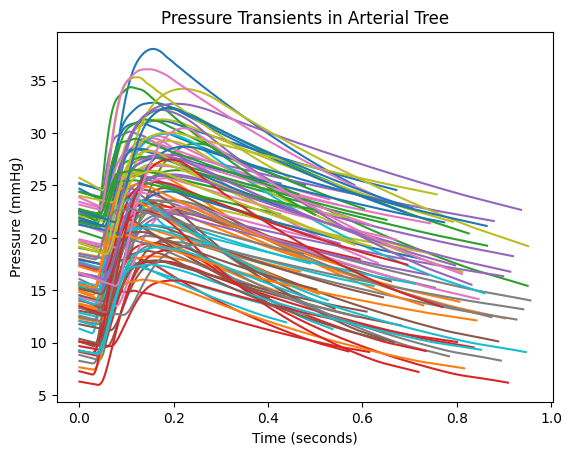

In [23]:
# Initialize the plot
fig, ax = plt.subplots()

# Loop over all realizations
for ind in range(len(test)): 
    # Adjust time and pressure trace for each realization
    t = test[ind].loc[ind]['T'] - test[ind].loc[ind]['T'].loc[0]  # Time adjustment
    p_pat = test[ind].loc[ind]['p_pat']  # Pressure transient

    # Plot the pressure transient for each realization
    ax.plot(t, p_pat, label=f'Realisation {ind}')

# Set labels and title
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Pressure (mmHg)')
ax.set_title('Pressure Transients in Arterial Tree')

# Add legend to the plot
#ax.legend()

# Display the plot
plt.show()

In [24]:
ind = 0
p_pat_raw = test[ind].loc[ind]['p_pat']
p_pat_raw



time_ind
0      25.231605
1      25.224337
2      25.217070
3      25.209804
4      25.202538
         ...    
995    25.068891
996    25.061685
997    25.054479
998    25.047274
999    25.040069
Name: p_pat, Length: 1000, dtype: float64

In [25]:
main_path = os.getcwd()
main_path

 
os.system(f'mkdir -p {main_path}/Outputs/Out_fixed/pressure_traces_r_pat')

0

## Save individual pressure traces, CO and dt

In [26]:
# Create column headers
headers = list(range(100)) + ['CO', 'dt']

# List to collect all pressure traces
pressure_traces_list = []

for ind in range(len(test)):
    p_pat_raw = test[ind].loc[ind]['p_pat'].values.copy()
    T = test[ind].loc[ind]['T'].values.copy()
    T_resample = np.linspace(T[0], T[-1], 100)

    # Interpolate pressure for 100 timesteps from 1000
    p_pat_resampled = np.interp(T_resample, T, p_pat_raw)

    q_pat = test[ind].loc[ind]['q_pat'].values.copy()
    CO = np.sum(q_pat) * (T[1] - T[0]) / (T[-1] - T[0]) * 60. / 1000.  # L / min
    
    # Record time interval, approx T (input param) / 100, there are some rounding differences due to interpolation
    tl = T_resample - test[ind].loc[ind]['T'].iloc[0]
    dt = np.diff(tl)[0]

    # Create a 2D array for saving
    pressure_trace = np.hstack((p_pat_resampled, [CO], [dt]))
    pressure_traces_list.append(pressure_trace)

    # Save individual pressure trace to CSV with headers
    individual_df = pd.DataFrame([pressure_trace], columns=headers)
    individual_df.to_csv(f'{main_path}/Outputs/Out_fixed/pressure_traces_r_pat/pressuretrace_{ind}.csv', index=False)

# Convert the list of pressure traces to a DataFrame
pressure_traces_df = pd.DataFrame(pressure_traces_list, columns=headers)

# Save the DataFrame to a single CSV file with headers
pressure_traces_df.to_csv(f'{main_path}/Outputs/Out_fixed/pressure_traces_r_pat/all_pressure_traces.csv', index=False)

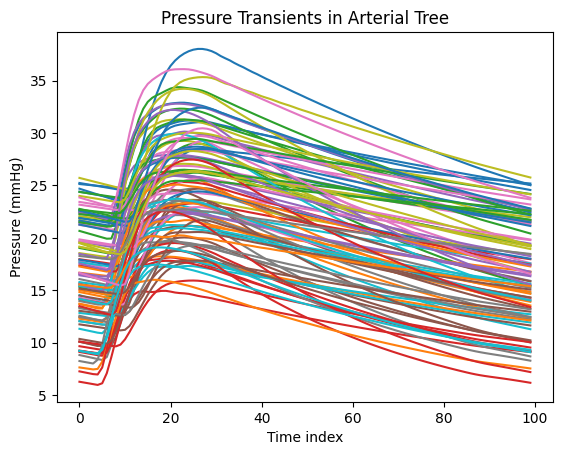

In [27]:
# Initialize the plot
fig, ax = plt.subplots()

# Loop over all realizations
for ind in range(len(test)): 
    p_pat_raw = test[ind].loc[ind]['p_pat'].values.copy()
    T = test[ind].loc[ind]['T'] - test[ind].loc[ind]['T'].loc[0]  # Time adjustment
    T = T.values.copy()
    T_resample = np.linspace(T[0], T[-1], 100)
    

    # Interpolate pressure for 100 timesteps from 1000
    p_pat_resampled = np.interp(T_resample, T, p_pat_raw)

    # Plot the interpolated pressure transient for each realization
    ax.plot(list(range(100)), p_pat_resampled, label=f'Realisation {ind}')

# Set labels and title
ax.set_xlabel('Time index')
ax.set_ylabel('Pressure (mmHg)')
ax.set_title('Pressure Transients in Arterial Tree')

# Add legend to the plot
#ax.legend()

# Display the plot
plt.show()

Conducting PCA on Pressure Traces

In [28]:
main_path

'/Users/pmzff/Documents/GitHub/ModularCircFF/Emulation'

In [29]:
# Import Data

# Define the path to the folder containing the CSV files
folder_path = main_path+'/Outputs/Out_fixed/pressure_traces_r_pat'

df = pd.read_csv(f'{folder_path}/all_pressure_traces.csv')

# Print the DataFrame
print(df)

            0          1          2          3          4          5  \
0   25.231605  25.158298  25.085096  25.011995  24.938949  24.865979   
1   13.715027  13.632844  13.550408  13.467799  13.385092  13.340452   
2   15.330083  15.201518  15.073150  14.945089  14.817433  14.690269   
3    9.213986   9.163167   9.112054   9.060693   9.010655   9.105259   
4   19.645850  19.572612  19.499388  19.426201  19.353059  19.279978   
..        ...        ...        ...        ...        ...        ...   
95  10.364598  10.289193  10.213660  10.138053  10.062429   9.986840   
96  16.656537  16.519406  16.382788  16.246745  16.111329  15.976593   
97  18.273006  18.224782  18.176481  18.128088  18.079666  18.031244   
98  19.139775  19.059007  18.978240  18.897507  18.816822  18.736212   
99   9.223599   9.144477   9.064902   8.985025   8.915638   9.337365   

            6          7          8          9  ...         92         93  \
0   24.793136  24.720409  24.647772  24.575245  ...  25.54

In [48]:
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

# Copy the data and separate the target variable (only pressure traces)
#X = df
#X = df.iloc[:,:101].copy() # traces + CO
X = df.iloc[:,:100].copy() # traces only

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it - standardize
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names, index=df.index)

X_pca.head()



,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,14.672208,-1.820989,-0.242595,0.484951,-0.275089,-0.027033,-0.134759,0.095476,0.007930,-0.004332
1,-4.957084,0.857850,-1.151066,0.134817,0.199933,-0.146478,0.049641,-0.070240,-0.006424,-0.023940
2,1.729320,2.687650,3.080620,-0.233092,0.067478,0.119271,0.120083,-0.050761,-0.029940,-0.054161
3,-17.616349,-1.624573,-0.841759,0.057564,0.167649,-0.029903,0.054834,0.021831,0.015344,-0.018049
4,4.124239,-0.868110,-0.813737,-0.321976,-0.047071,0.088544,0.039880,0.028722,0.018717,-0.005504


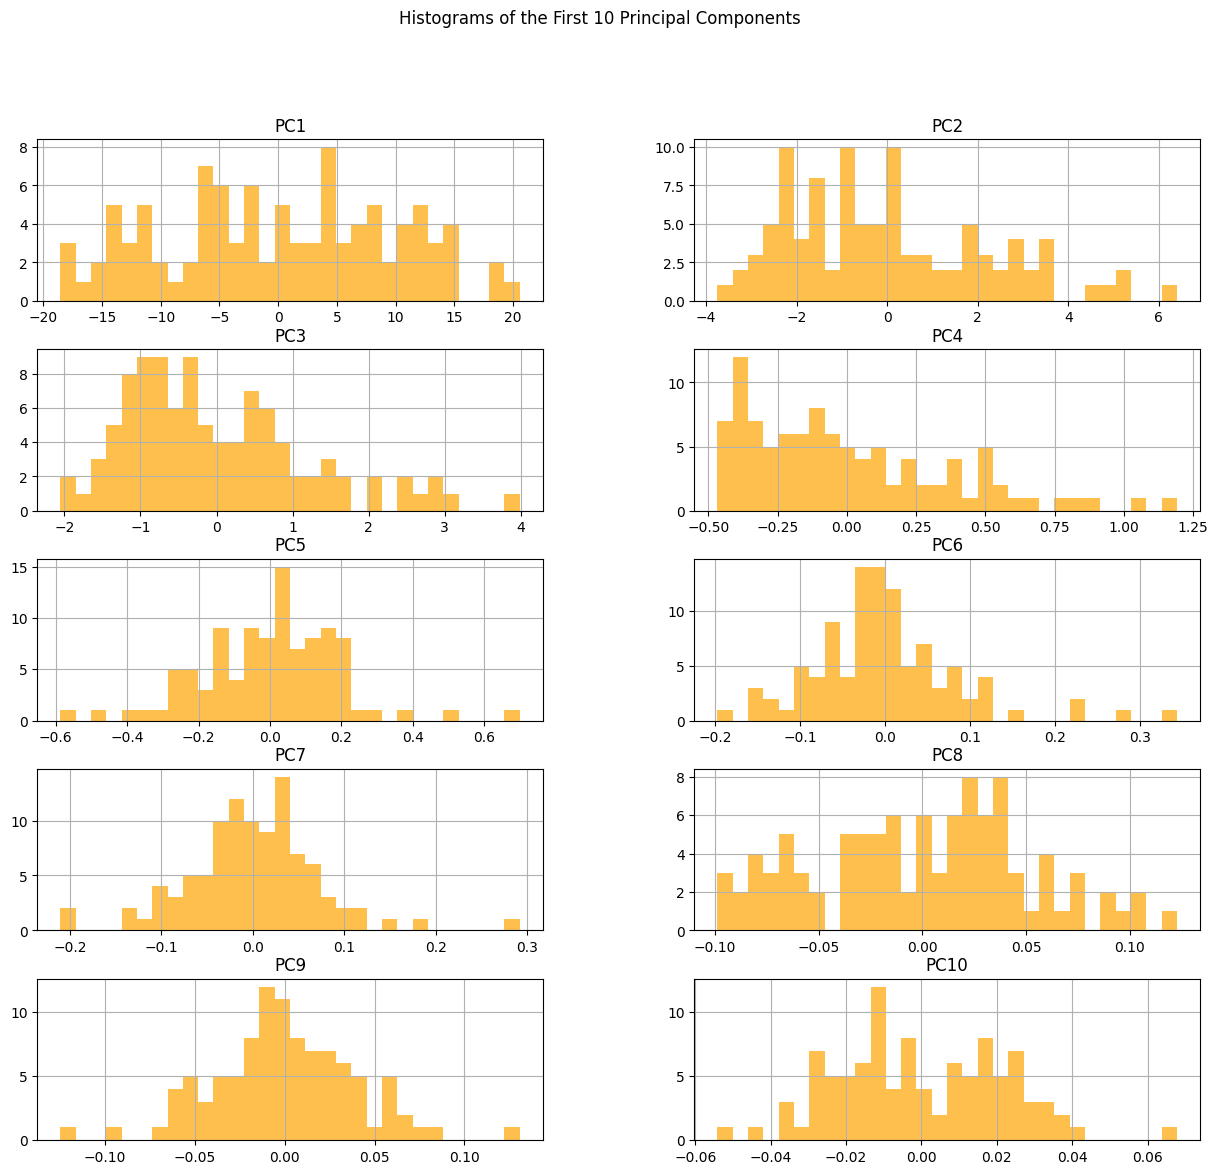

In [49]:
# Plot Histograms
X_pca.hist(bins=30, figsize=(15, 13), layout=(5, 2), alpha=0.7, color='orange')
plt.suptitle('Histograms of the First 10 Principal Components')
plt.show()

In [50]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    explained_variance_ratio = pca.explained_variance_ratio_
    axs[0].bar(grid, explained_variance_ratio, log=True)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )

    # Cumulative Variance
    cumulative_explained_variance = np.cumsum(explained_variance_ratio)
    axs[1].semilogy(grid, cumulative_explained_variance, "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", 
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    fig.tight_layout()
    return axs

/var/folders/28/nchybyxs1ps5wk3zmnqdpd8r0000gr/T/ipykernel_62751/1737913637.py:9: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axs[0].set(


array([<Axes: title={'center': '% Explained Variance'}, xlabel='Component'>,
       <Axes: title={'center': '% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

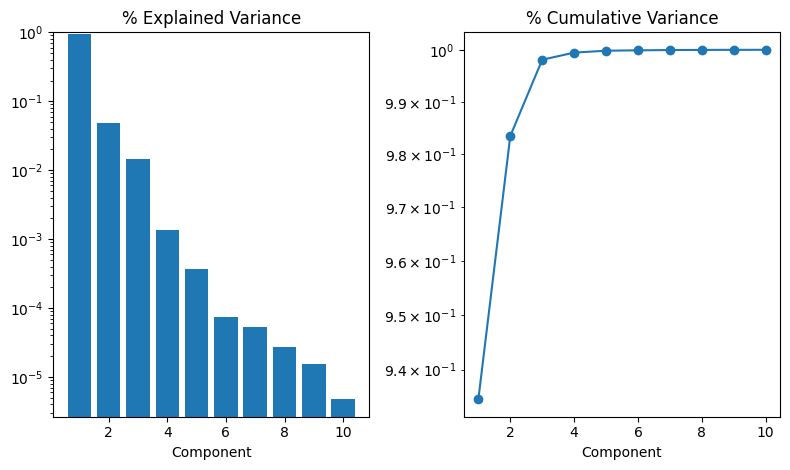

In [51]:
plot_variance(pca)

In [52]:
os.system(f'mkdir -p {main_path}/Outputs/Out_fixed/PCA')

# Save first 3 Principle Component data
for i in list(range(3)):

 PC = X_pca.iloc[:,i]
 PC.to_csv(f'{main_path}/Outputs/Out_fixed/PCA/PC{i+1}.csv', index=False)






### Reconstructing the output data $f(x)$

In [53]:
from sklearn.metrics import mean_squared_error

# Eigenvector matrix for first 3 PC
Q = pca.components_[:3,:]

# PC matrix
Z = X_pca.iloc[:, :3].values

# Reconstruct the data using first 3 principle components
X_reconstructed = np.dot(Z, Q)

# Inverse the standardization process
X_reconstructed = scaler.inverse_transform(X_reconstructed)

# Convert reconstructed data back to a dataframe
X_reconstructed_df = pd.DataFrame(X_reconstructed, columns=X.columns, index=df.index)

# Display the reconstructed dataframe
X_reconstructed_df.head()

mse = mean_squared_error(X, X_reconstructed)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 0.03813233016665461


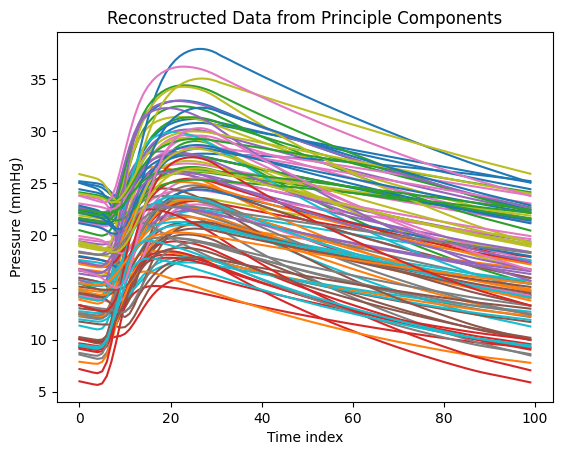

In [54]:
# Initialize the plot
fig, ax = plt.subplots()

# Loop over all realizations
for ind in range(len(X_reconstructed_df)): 
   
    # Plot the interpolated pressure transient for each realization
    ax.plot(list(range(100)), X_reconstructed_df.iloc[ind], label=f'Realisation {ind}')

# Set labels and title
ax.set_xlabel('Time index')
ax.set_ylabel('Pressure (mmHg)')
ax.set_title('Reconstructed Data from Principle Components')

# Add legend to the plot
#ax.legend()

# Display the plot
plt.show()

### Plotting Eigenvectors

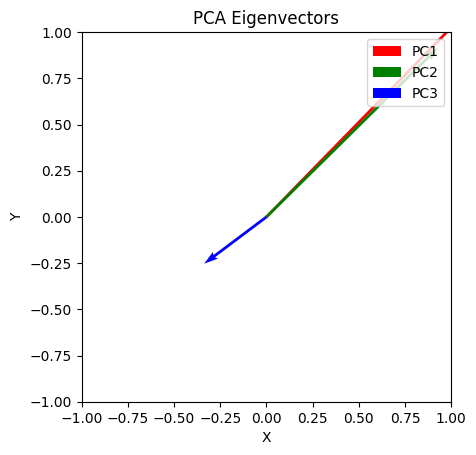

In [55]:
# Get eigenvectors (principal components) and eigenvalues
eigenvectors = pca.components_[:3,:]
eigenvalues = pca.explained_variance_[:3]

# Plot the eigenvectors
fig, ax = plt.subplots()
for i in range(len(eigenvalues)):
    ax.quiver(0, 0, eigenvectors[i, 14], eigenvectors[i, 15], scale=1/eigenvalues[i], scale_units='xy', angles='xy', color=['r', 'g', 'b'][i], label=f'PC{i+1}')

# Adjust plot settings
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')
plt.legend()
plt.title('PCA Eigenvectors')
plt.show()

#print(eigenvalues)
#print(eigenvectors)



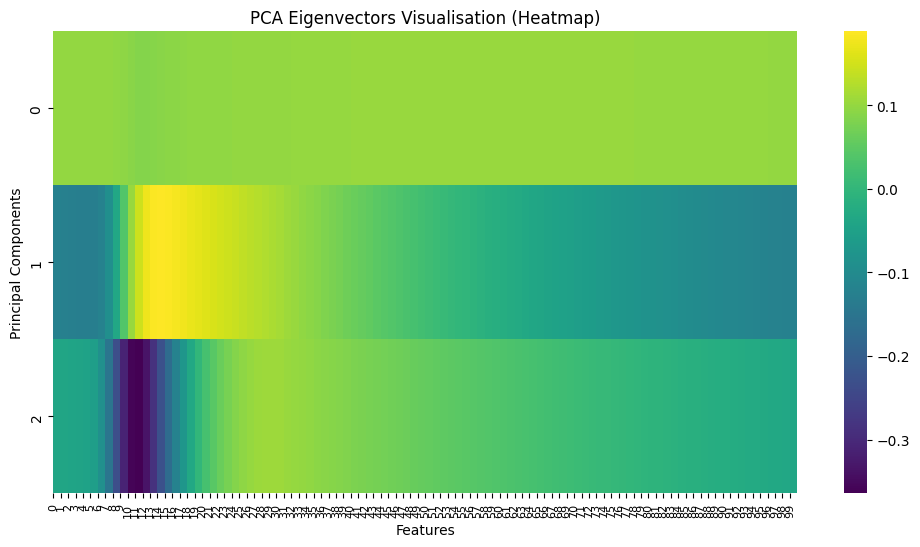

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a heatmap to visualize the eigenvectors
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the heatmap
sns.heatmap(eigenvectors, annot=False, cmap='viridis', ax=ax, cbar=True, yticklabels=True)

# Set x-axis labels from 0 to 99
ax.set_xticks(np.arange(0, eigenvectors.shape[1], step=1))  # Set ticks from 0 to 99
ax.set_xticklabels(np.arange(0, eigenvectors.shape[1], step=1))  # Set labels from 0 to 99
ax.set_xlabel('Features')
ax.set_ylabel('Principal Components')
ax.set_title('PCA Eigenvectors Visualisation (Heatmap)')

# Rotate x-axis labels by 45 degrees
plt.xticks(fontsize=8 )

# Adjust y-axis labels to show only once on the left
ax.yaxis.set_ticks_position('left')  # Ensure tick marks are visible on the left
plt.show()